# Chapter 6 - String Operations- Which month was the snowiest

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

We saw earlier that pandas is really good at dealing with dates. It is also amazing with strings! We're going to go back to our weather data from Chapter 5, here.

In [2]:
weather_2012 = pd.read_csv('../../data/weather_2012.csv', date_format='%Y-%m-%d %H:%M:%S', index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## String operations

You'll see that the 'Weather' column has a text description of the weather that was going on each hour. We'll assume it's snowing if the text description contains "Snow".

Pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great [examples](http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods) in the documentation.

Try to filter the column "Weather" to identify snowing days.

In [3]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

This gives us a binary vector, which is a bit hard to look at, so we'll plot it.

<Axes: xlabel='Date/Time'>

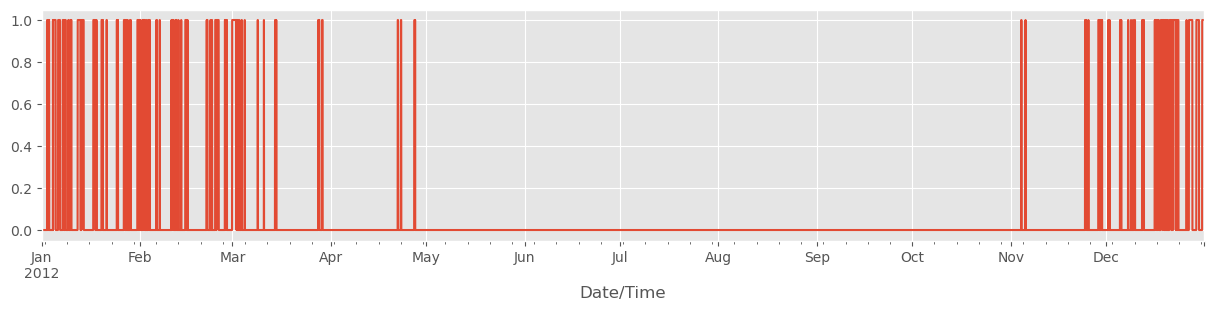

In [4]:
# More useful!
is_snowing=is_snowing.astype(float)
is_snowing.plot()

## Use resampling to find the snowiest month

Use the `resample()` method and try to plot the median temperature each month.

<Axes: xlabel='Date/Time'>

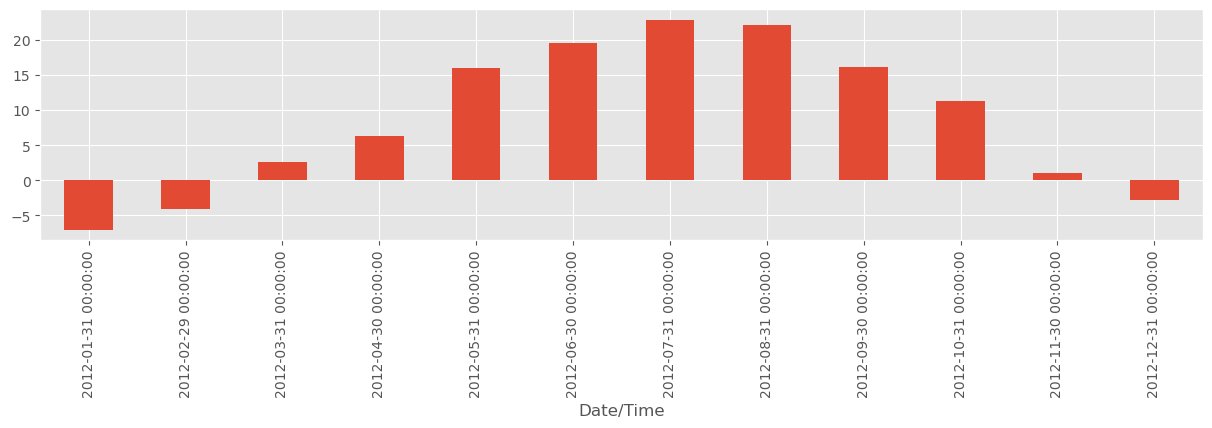

In [5]:
weather_2012['Temp (C)'].resample('ME').apply("median").plot(kind='bar')

Unsurprisingly, July and August are the warmest.

So we can think of snowiness as being a bunch of 1s and 0s instead of `True`s and `False`s. Use can use the methode `astype()` to convert the type.

and then use `resample` to find the percentage of time it was snowing each month

In [6]:
is_snowing.astype(float).resample('ME').apply("mean")

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: ME, Name: Weather, dtype: float64

Plot the percentage of time it was snowing each month.

<Axes: xlabel='Date/Time'>

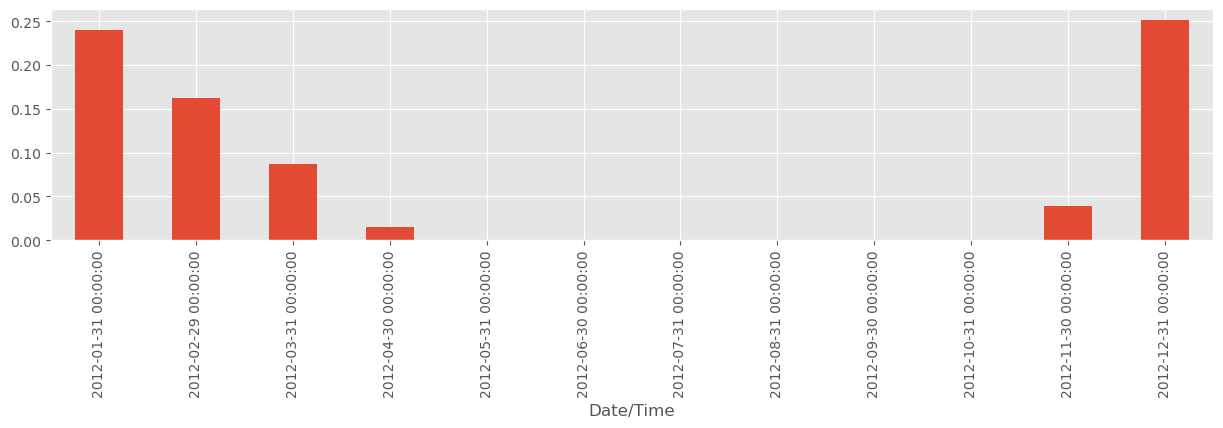

In [7]:
is_snowing.astype(float).resample('ME').apply("mean").plot(kind='bar')

So now we know! In 2012, December was the snowiest month. Also, this graph suggests something that I feel -- it starts snowing pretty abruptly in November, and then tapers off slowly and takes a long time to stop, with the last snow usually being in April or May.

# 6.3 Plotting temperature and snowiness stats together

We can also combine these two statistics (temperature, and snowiness) into one dataframe and plot them together:

In [8]:
temperature = weather_2012['Temp (C)'].resample('ME').apply("median")
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('ME').apply("mean")

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

We'll use `concat` again to combine the two statistics into a single dataframe.

In [9]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


Plot the results. Because the difference of scale in the data, it is better by plotting them on two separate graphs.

<Axes: xlabel='Date/Time'>

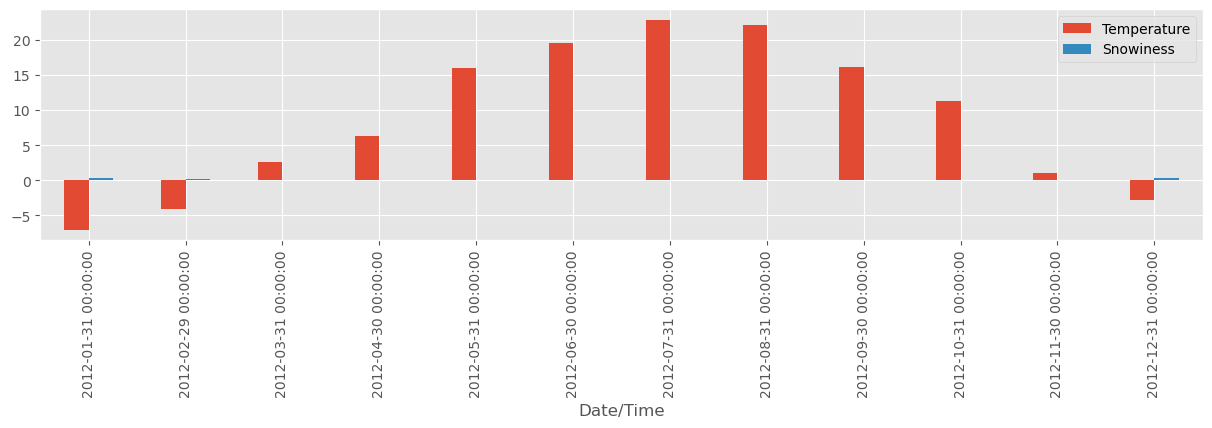

In [10]:
stats.plot(kind='bar')

array([<Axes: title={'center': 'Temperature'}, xlabel='Date/Time'>,
       <Axes: title={'center': 'Snowiness'}, xlabel='Date/Time'>],
      dtype=object)

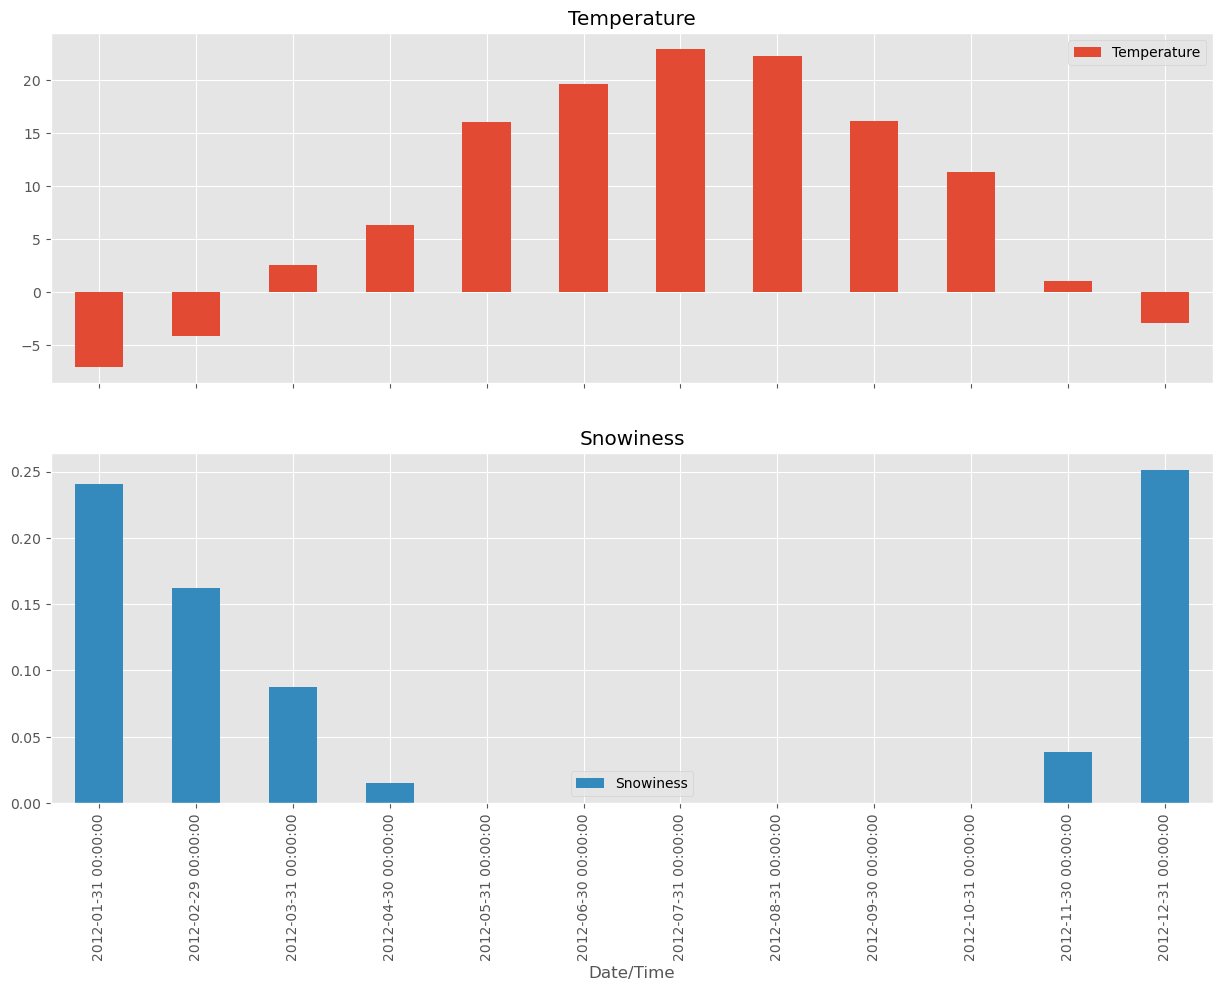

In [11]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))